In [311]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pickle


In [273]:
path = "C:/Users/61487/Desktop/CompanyNGO/companyandngo/Data/"
All_data = pd.read_csv(path + 'final_features.csv')
US_Dataset = pd.read_csv(path + 'final_features.csv',skiprows=range(1, 6))
US_Dataset.head()

,Date,Non-farm_Payrolls,Civilian_Unemployment_Rate,Effective_Fed_Funds,CPI_All_Items,10Y_Treasury_Rate,5Y_Treasury_Rate,3_Month_T-Bill_Rate,IPI,S&P_500_Index,...,10Y_Treasury_Rate_12_chg,S&P_500_Index_12_chg,3M_10Y_Treasury_Spread,Payrolls_3mo_vs_12mo,IPI_3mo_vs_12mo,CPI_3mo_vs_12mo,Recession,Recession_in_6mo,Recession_in_12mo,Recession_in_24mo
0,2019-11-01,151814.0,3.5,1.55,257.824,1.81,1.64,1.54,110.0388,3140.979980,...,0.580128,1.137966,0.27,1.003182,0.005914,1.003663,0,0,0,0
1,2019-10-01,151553.0,3.6,1.83,257.229,1.71,1.53,1.65,109.0270,3037.560059,...,0.542857,1.120152,0.06,1.002594,0.007559,1.000345,0,0,0,0
2,2019-09-01,151368.0,3.5,2.04,256.593,1.70,1.57,1.89,109.4725,2976.739990,...,0.566667,1.021538,-0.19,1.002731,0.003631,1.001611,0,0,0,0
3,2019-08-01,151160.0,3.7,2.13,256.294,1.63,1.49,1.95,109.8543,2926.459961,...,0.564014,1.008595,-0.32,1.002902,0.002738,1.000361,0,0,0,0
4,2019-07-01,150953.0,3.7,2.40,256.087,2.06,1.83,2.10,109.0852,2980.379883,...,0.712803,1.058265,-0.04,0.999365,-0.003103,0.999759,0,0,0,0


In [277]:
#declaring variables for features

#Treasury_spread=le.fit_transform(US_Dataset['10Y_Treasury_Rate'])
#Unemployment_rate =le.fit_transform(US_Dataset['Civilian_Unemployment_Rate'])
#Recession_12months =le.fit_transform(US_Dataset['Recession_in_12mo'])
#Treasury_spread = US_Dataset['3M_10Y_Treasury_Spread']
#Treasury_rate_12months = US_Dataset['10Y_Treasury_Rate_12_chg']
#Unemployment_rate = US_Dataset['Civilian_Unemployment_Rate']
#Payroll = US_Dataset['Payrolls_3mo_vs_12mo']
#Sp_500_12months = US_Dataset['S&P_500_Index_12_month_pchg']
#Effective_funds_12months = US_Dataset['Effective_Fed_Funds_12_chg']
Recession_6months = US_Dataset['Recession_in_6mo']

Recession_12months =  US_Dataset['Recession_in_12mo']

date = All_data['Date']
Recession_24months = US_Dataset['Recession_in_24mo']

#Date = US_Dataset['Date']
Features = ['Date', 'Payrolls_3mo_vs_12mo', 'Effective_Fed_Funds_12_chg', 'CPI_All_Items_3_mo_annualised',
            '10Y_Treasury_Rate_12_chg', '3M_10Y_Treasury_Spread', 'S&P_500_Index_12_chg','Recession_in_6mo','Recession_in_12mo','Recession_in_24mo']
recession_dataset  = US_Dataset[Features]

In [260]:

#built gaussian classifies
Model_gb = GaussianNB()
#Features = np.array(list(zip(Treasury_spread,Payroll,Effective_funds_12months,Treasury_rate_12months)))

#Predicting_variable = np.array(list(zip(Recession_6months,Recession_12months,Recession_24months)))
#print(Predicting_variable.shape)
#Model_gb.fit(Features,Recession_12months)



In [299]:

#np.array.reshape(1, -1)
#lb = preprocessing.MultiLabelBinarizer()

#predicting for 6months
X_train, X_test, y_train, y_test = train_test_split(recession_dataset.iloc[:,1:6],Recession_6months,test_size=0.3,random_state=10)
Model_gb.fit(X_train, y_train)
Prediction_for_6months = Model_gb.predict(X_test)
Prediction_for_6months 


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [307]:

#Evaluationg Model
print("Accuracy:",metrics.accuracy_score(y_test, Prediction_for_6months))
recession_predicted_6 = pd.DataFrame(Model_gb.predict_proba(X_test)[:,1])
ROC_AUC=roc_auc_score(y_test,recession_predicted_6)
ROC_AUC
recession_predicted_6mo = pd.DataFrame(recession_predicted_6)
recession_predicted_6mo
recession_predicted_6mo.to_csv('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Naives_6mo.csv',index=False)



Accuracy: 0.8060344827586207


In [309]:
#prediction for recession 12 months
X_train, X_test, y_train, y_test = train_test_split(recession_dataset.iloc[:,1:6],Recession_12months, test_size=0.30,random_state=350)
Model_gb.fit(X_train, y_train)
Prediction_for_12months= Model_gb.predict(X_test)
Prediction_for_12months
#Evaluationg Model
print("Accuracy:",metrics.accuracy_score(y_test, Prediction_for_12months))
recession_predicted_12 = pd.DataFrame(Model_gb.predict_proba(X_test)[:,1])
ROC_AUC=roc_auc_score(y_test,recession_predicted_12)
ROC_AUC
recession_predicted_12 = pd.DataFrame(recession_predicted_12)
recession_predicted_12
recession_predicted_12.to_csv('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Naives_12mo.csv',index=False)



Accuracy: 0.8836206896551724


In [310]:

#prediction for recession 2 years
X_train, X_test, y_train, y_test = train_test_split(recession_dataset.iloc[:,1:5],Recession_24months, test_size=0.30,random_state=350)
Model_gb.fit(X_train, y_train)
Prediction_for_24months= Model_gb.predict(X_test)
print(Prediction_for_24months)
#Evaluationg Model
print("Accuracy:",metrics.accuracy_score(y_test, Prediction_for_24months))
recession_predicted_24 = pd.DataFrame(Model_gb.predict_proba(X_test)[:,1])
ROC_AUC=roc_auc_score(y_test,recession_predicted_24)
ROC_AUC

recession_predicted_24 
recession_predicted_24.to_csv('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Naives_24mo.csv',index=False)


[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0]
Accuracy: 0.8060344827586207


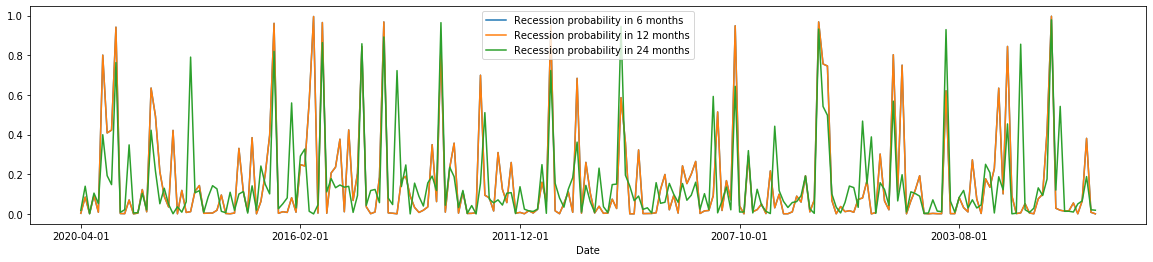

In [319]:

recession_probabilities = pd.concat([date,recession_predicted_6mo,recession_predicted_12,recession_predicted_24 ],axis =1)
recession_probabilities.columns = ['Date','Recession probability in 6 months','Recession probability in 12 months','Recession probability in 24 months']
recession_probabilities.head(20)
y_axis = ['Recession probability in 6 months','Recession probability in 12 months','Recession probability in 24 months']

recession_probabilities.plot('Date', y_axis,figsize =(20,4))


In [312]:
pickle.dump(recession_predicted_6, open('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Recession_in_6mo.nb', 'wb'))
pickle.dump(recession_predicted_12, open('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Recession_in_12mo.nb', 'wb'))
pickle.dump(recession_predicted_24, open('C:/Users/61487/Desktop/CompanyNGO/companyandngo/Prediction models/Naive_Bayes/Recession_in_24mo.nb', 'wb'))

